## Scala's real-world project repository data¶

With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- publicly available. 

I'm going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

In [1]:
import pandas as pd 
%matplotlib inline

In [11]:
pulls = pd.read_csv('datasets/pulls.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [16]:
data = pulls.merge(pull_files, on='pid')
display(data.head())
print(data.shape)

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


(85588, 4)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1e0a0c850>,
      dtype=object)

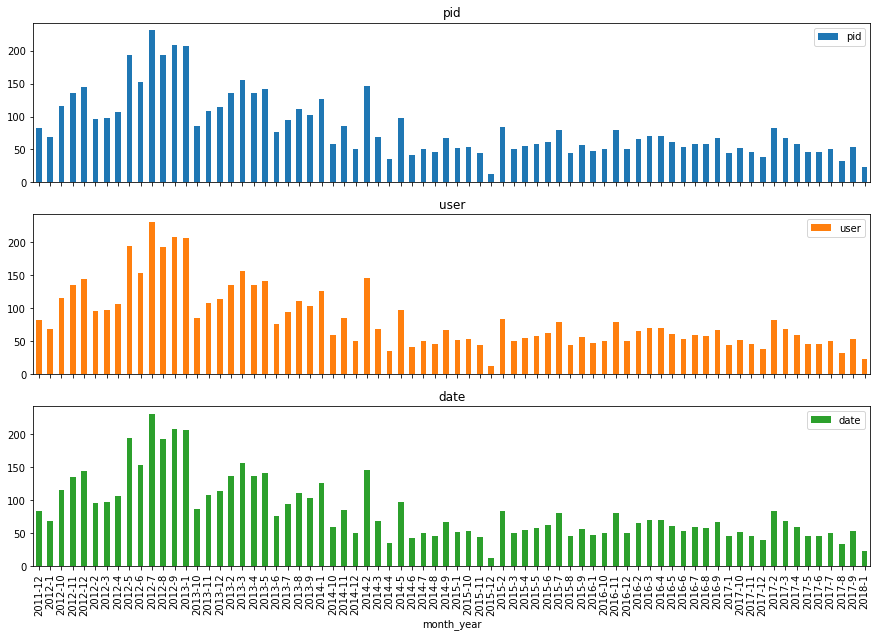

In [26]:
#  Has the project been abandoned altogether?

pulls['month_year'] = pulls.apply(lambda x: str(x['date'].year) + '-' + str(x['date'].month), axis = 1)

counts = pulls.groupby('month_year').count()

counts.plot.bar(subplots=True, figsize=(15, 10), rot=90)

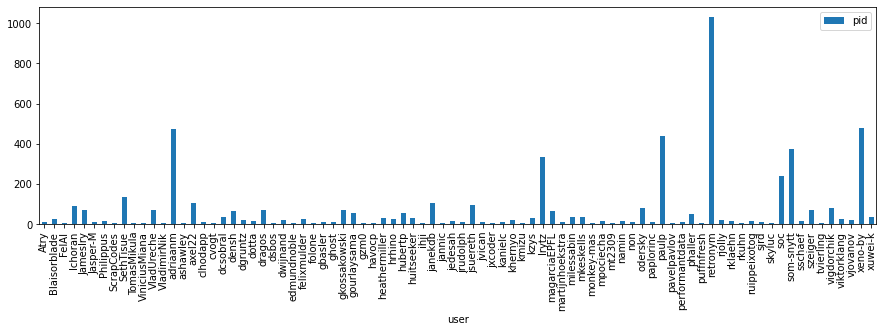

In [58]:
by_user = pulls.groupby('user').agg({'pid':'count'})

by_user[by_user['pid'] >=5].plot.bar(figsize=(15, 4))

In [60]:
# the last 10 pull requests
last_10 = pulls.nlargest(10, 'date')

joined_pr = pull_files.merge(last_10, on='pid')

files = set(joined_pr['file'])

files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [61]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = data[data['file'] == file]

author_counts = file_pr.groupby('user').count()

print(author_counts.nlargest(3, 'pid'))

          pid  date  file
user                     
xeno-by    11    11    11
retronym    5     5     5
soc         4     4     4


In [62]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = pull_files[pull_files['file'] == file]

joined_pr = file_pr.merge(pulls, on='pid')

users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

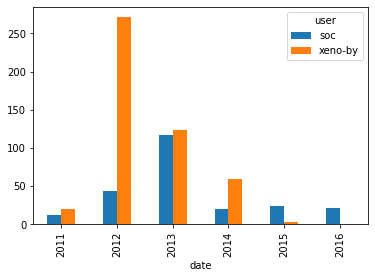

In [63]:
authors = ['xeno-by', 'soc']

by_author = pulls[pulls['user'].isin(authors)]

counts = by_author.groupby(['user', pulls['date'].dt.year]).agg({'pid': 'count'}).reset_index()

counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

counts_wide.plot(kind='bar')

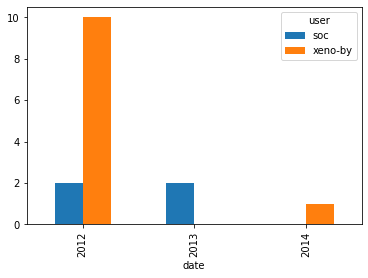

In [64]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

by_author = data[data['user'].isin(authors)]

by_file = by_author[by_author['file'] == file]

grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

by_file_wide = grouped.pivot_table(index = 'date',columns = 'user',values = 'pid', fill_value = 0)

by_file_wide.plot(kind='bar')

## Final thoughts

Is the project still actively maintained? The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. 

Is there camaraderie in the project? for the big projects yes.

Observed whose files were changed in the last ten pull requests.

Observed who made the most pull requests to a given file.

Analize the pull requests of two special developers, SDC and xeno-by